In [42]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("Salary_dataset.csv")
df = df[['YearsExperience','Salary']]

In [44]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Text(0, 0.5, 'salary')

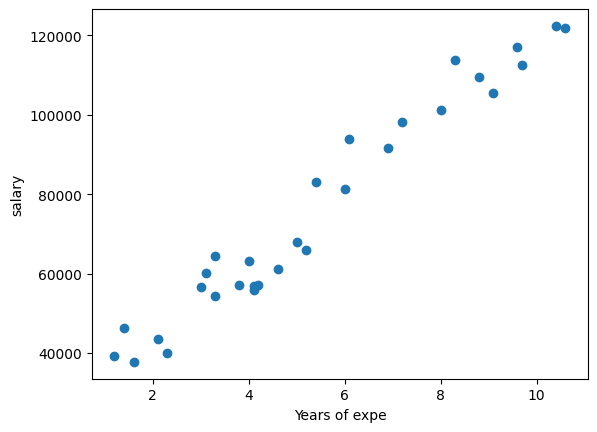

In [45]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of expe')
plt.ylabel('salary')

In [46]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [47]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [48]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
lr = LinearRegression()

In [51]:
lr

LinearRegression()

In [52]:
lr.fit(X_train,Y_train)

LinearRegression()

In [53]:
X_test

,YearsExperience
1,1.4
0,1.2
14,4.6
9,3.8
21,7.2
19,6.1


In [54]:
Y_test

1     46206.0
0     39344.0
14    61112.0
9     57190.0
21    98274.0
19    93941.0
Name: Salary, dtype: float64

In [55]:
#lr.predict(X_test.iloc[0].values.reshape(1,1))

lr.predict([[1.4]])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36834.63210301])

In [56]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34920.71472592])

Text(0, 0.5, 'salary')

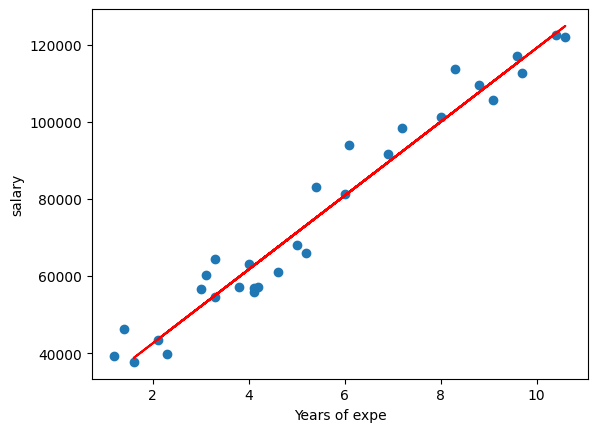

In [57]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Years of expe')
plt.ylabel('salary')

In [58]:
#slope or weight
m = lr.coef_

In [59]:
#intercept or offset
c = lr.intercept_

In [60]:
# y = m *x + c
m * 1.4 + c

array([36834.63210301])

In [61]:
m * 3.5 + c

array([56930.76456242])

In [62]:
# salary = m * yearsofexperiance + c

#c=0   
# what if experiance is 0 then the salary 
# becomes 0 which is wrong so c is used as offset value 


In [63]:
# mae
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [72]:
y_pred = lr.predict(X_test)
y_pred

array([36834.63210301, 34920.71472592, 67457.3101364 , 59801.64062805,
       92338.23603852, 81811.69046455])

In [69]:
Y_test.values

array([46206., 39344., 61112., 57190., 98274., 93941.])

In [70]:
mean_absolute_error(Y_test,y_pred)

np.float64(6802.779572073899)

In [71]:
mean_squared_error(Y_test,y_pred)

np.float64(56137509.99782553)

In [73]:
np.sqrt(mean_squared_error(Y_test,y_pred))

np.float64(7492.496913434502)

In [75]:
r2_score(Y_test,y_pred)

0.8886956733784563

In [76]:
X_test.shape

(6, 1)

In [77]:
#adjested r2 
r2 = r2_score(Y_test,y_pred)
1-((1-r2)*(6-1)/(6-1-1))

0.8608695917230704